## Peterside Hospital
### Predicting Heart disease

In [1]:
#!pip install xgboost

In [2]:
# import Libraries

# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# classifier Library (Algorithms)
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# disable warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
#  load dataset
df=pd.read_csv(r"C:\Users\FOLASADE\OneDrive\Desktop\Learning\DataSci Learn 10Alytics\PDF for Practice\1Python Pract\heart.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### Features in the dataset and meaning

- age (Age in years)
- sex (0-female amd 1-male)
- chest pain type (cp) (1: typical angina, 2: atypical angina, 3: non angina pain, 4: asymptomatic)
- resting blood pressure (trestbps)
- serum cholesterol (chol)
- fasting blood sugar (fbs) (0-False and 1-True)
- resting electrocardiographic results (restecg)
- maximum heart rate achieved (thalach)
- exercise-induced angina (exang) (0-NO and 1-YES)
- ST depression induced by exercise relative to rest (oldpeak)
- the slope of the peak exercise ST segment (slope)
- number of major vessels colored by flourosopy (ca)
- thalassemia (thal) (3=normal, 6=fixed, 7=revercible defeat)
- Target (0-NO and 1-YES)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# change columns name for better recognitions
df.columns=["age","sex","chest pain type","resting blood pressure","cholesterol","fasting blood sugar","rest ecg",
            "max heart rate","exercise-induced","ST depression","slope","major vessels","thalassemia","Target"]

In [6]:
df.head(3)

,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,rest ecg,max heart rate,exercise-induced,ST depression,slope,major vessels,thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest pain type         303 non-null    int64  
 3   resting blood pressure  303 non-null    int64  
 4   cholesterol             303 non-null    int64  
 5   fasting blood sugar     303 non-null    int64  
 6   rest ecg                303 non-null    int64  
 7   max heart rate          303 non-null    int64  
 8   exercise-induced        303 non-null    int64  
 9   ST depression           303 non-null    float64
 10  slope                   303 non-null    int64  
 11  major vessels           303 non-null    int64  
 12  thalassemia             303 non-null    int64  
 13  Target                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

In [8]:
df.describe()

,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,rest ecg,max heart rate,exercise-induced,ST depression,slope,major vessels,thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


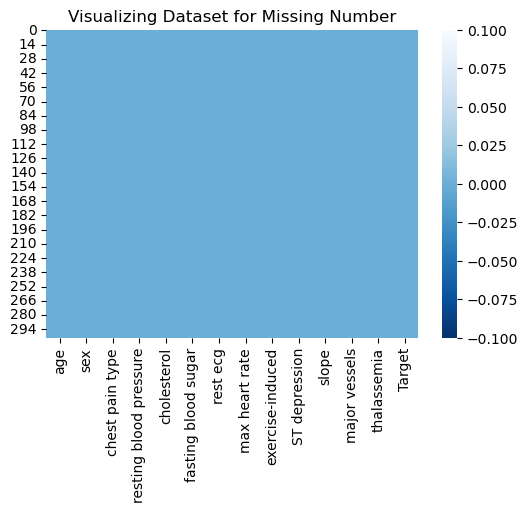

In [9]:
df.isnull().sum()

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")
plt.title("Visualizing Dataset for Missing Number");

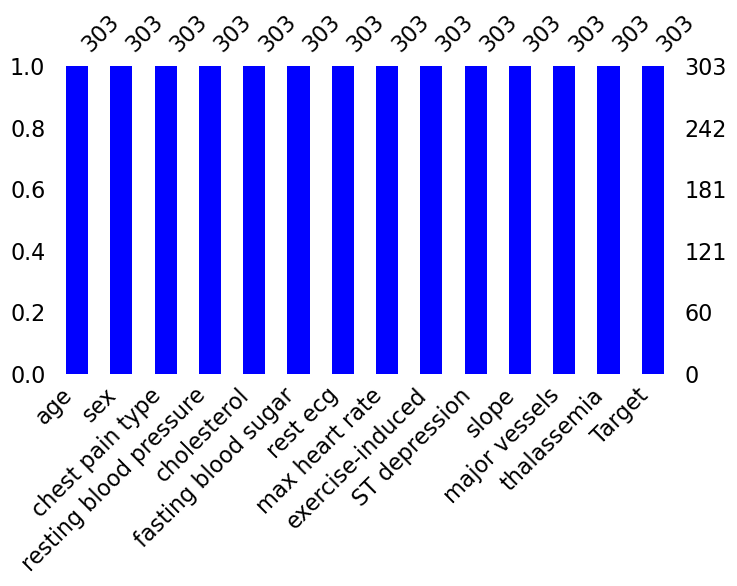

In [10]:
msno.bar(df, color="blue", figsize=(8,4));

## Exploratory Data Analysis

In [11]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'cholesterol', 'fasting blood sugar', 'rest ecg', 'max heart rate',
       'exercise-induced', 'ST depression', 'slope', 'major vessels',
       'thalassemia', 'Target'],
      dtype='object')

### Visualizing to Spot Outliers

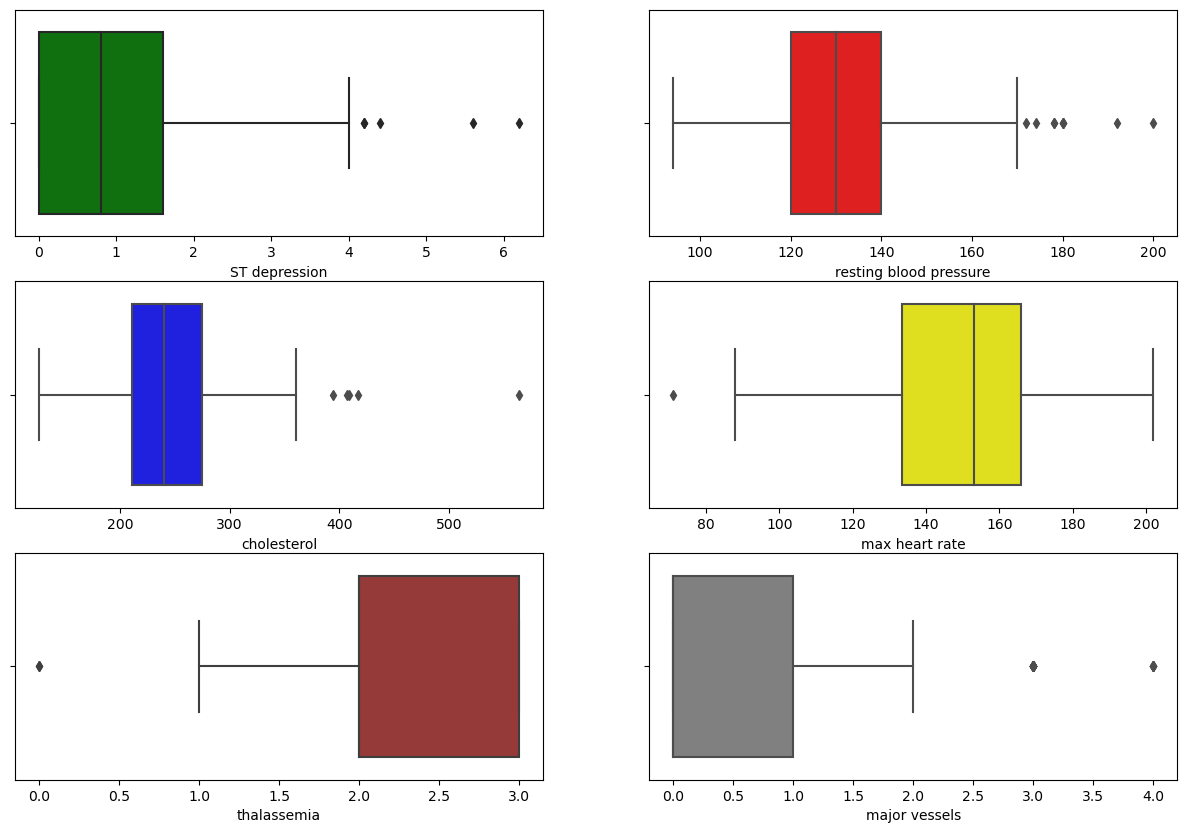

In [12]:
fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.boxplot(x=df["ST depression"],color="green", ax=axs[0,0])
#axs[0,0].set_title("ST depression induced by exercise relative to rest (oldpeak)")

sns.boxplot(x=df["resting blood pressure"],color="red", ax=axs[0,1])
#axs[0,1].set_title("resting blood pressure (trestbps)")

sns.boxplot(x=df["cholesterol"],color="blue", ax=axs[1,0])
#axs[1,0].set_title("serum cholesterol (chol)")

sns.boxplot(x=df["max heart rate"],color="yellow", ax=axs[1,1])
#axs[1,1].set_title("maximum heart rate achieved (thalach)")

sns.boxplot(x=df["thalassemia"],color="brown", ax=axs[2,0])
#axs[2,0].set_title("thalassemia (thal) (3=normal, 6=fixed, 7=revercible defeat)")

sns.boxplot(x=df["major vessels"],color="grey", ax=axs[2,1]);
#axs[2,1].set_title("number of major vessels colored by flourosopy (ca)")

The dataset contains several outliers, particularly in the features related to cholesterol, thalassemia, maximum heart rate, and major vessels. These outliers deviate significantly from the majority of data points and may require special attention during analysis and modeling.

In [13]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

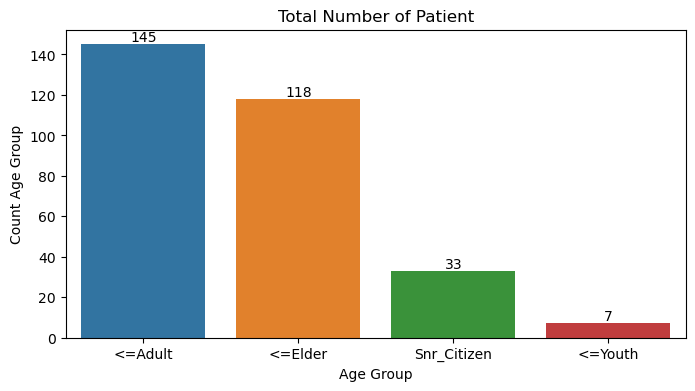

In [14]:
def Age_group(x):
    if x <= 35:
        return "<=Youth"
    elif x <= 55:
        return "<=Adult"
    elif x <= 65:
        return "<=Elder"
    else:
        return "Snr_Citizen"
    
df["Age_Group"]= df["age"].apply(Age_group)

# visualizing the Age gruop of Patient
plt.figure(figsize=(8,4))
Age=sns.countplot(x=df["Age_Group"], order=df["Age_Group"].value_counts(ascending=False).index)
values=df["Age_Group"].value_counts(ascending=False).values
Age.bar_label(container= Age.containers[0], labels=values)
plt.xlabel("Age Group")
plt.ylabel("Count Age Group")
Age.set_title("Total Number of Patient");

In the heart disease case study dataset, patients between the ages of 36 and 65 form the largest age group.

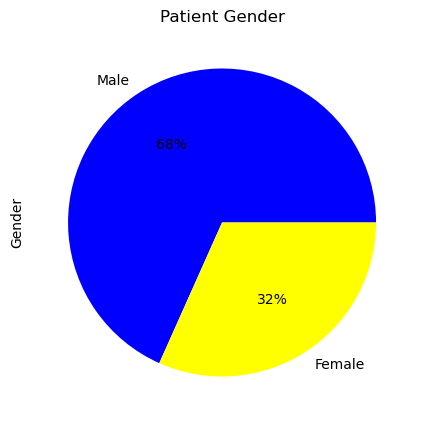

In [15]:
# visualizing Gender

def gender(x):
    if x== 1:
        return "Male"
    else:
        return "Female"
    
df["Gender"]= df["sex"].apply(gender)

# visualizing
df["Gender"].value_counts().plot(kind="pie", autopct="%1.0f%%", figsize=(5,5), colors=["blue","yellow"], title="Patient Gender");

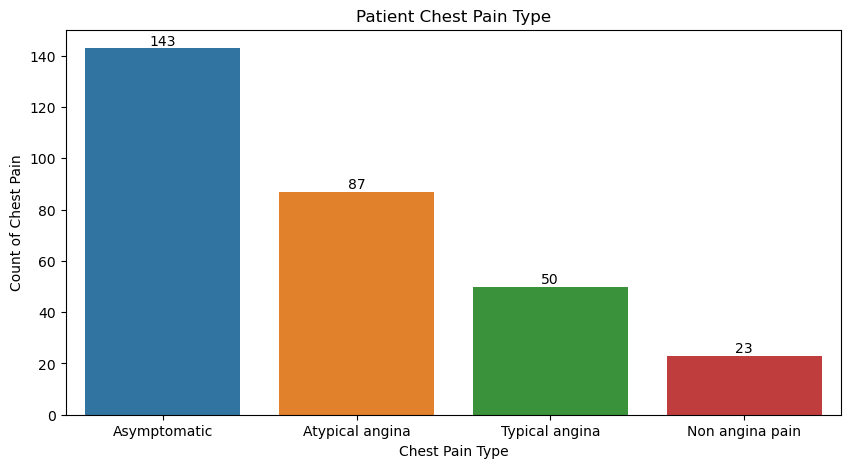

In [16]:
# chest pain type (cp) (1: typical angina, 2: atypical angina, 3: non angina pain, 4: asymptomatic)
# Visualizing chest pain type

def chest(x):
    if x==1:
        return "Typical angina"
    elif x==2:
        return "Atypical angina"
    elif x==3:
        return "Non angina pain"
    else:
        return "Asymptomatic"
    
df["chest_pain"]= df["chest pain type"].apply(chest)

# visualizing
plt.figure(figsize=(10,5))
chest=sns.countplot(x=df["chest_pain"], order=df["chest_pain"].value_counts(ascending=False).index)
values=df["chest_pain"].value_counts(ascending=False).values
chest.bar_label(container= chest.containers[0], labels=values)
plt.xlabel("Chest Pain Type")
plt.ylabel("Count of Chest Pain")
chest.set_title("Patient Chest Pain Type");

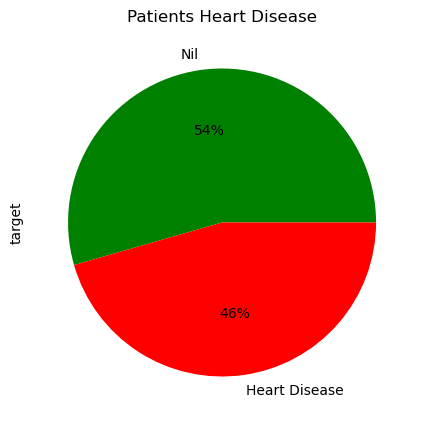

In [17]:
# probability of heart disease
def target(x):
    if x==0:
        return "Heart Disease"
    else:
        return "Nil"
    
df["target"]= df["Target"].apply(target)

#visualise
"""plt.figure(figsize=(7,4))
target= sns.countplot(x=df["target"], order=df["target"].value_counts(ascending=False).index)
values= df["target"].value_counts(ascending=False).values
target.bar_label(container=target.containers[0], labels=values)
plt.xlabel("Heart Disease or Not")
plt.ylabel("count of heart disease")
target.set_title("Patients Heart Disease");"""
df["target"].value_counts().plot(kind="pie", figsize=(5,5),title="Patients Heart Disease",colors=["green","red"],autopct="%1.0f%%");

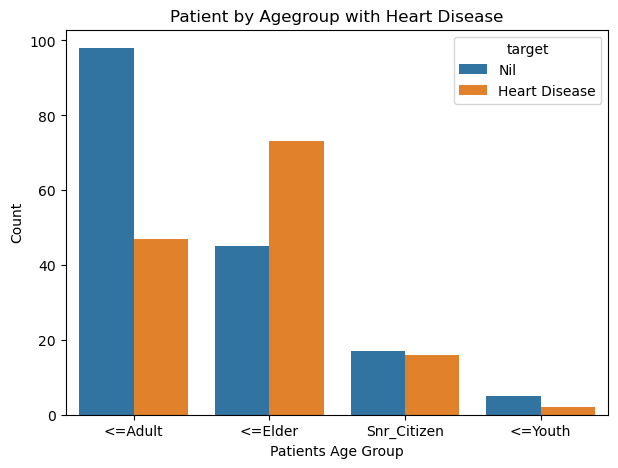

In [18]:
plt.figure(figsize=(7,5))
Age_Grp= sns.countplot(x="Age_Group", data=df, hue="target", order=df["Age_Group"].value_counts(ascending=False).index)
#values= df["Age_Group"].value_counts(ascending=False).values
#Age_Grp.bar_label(container=Age_Grp.containers[0], labels=values)
plt.xlabel("Patients Age Group")
plt.ylabel("Count")
Age_Grp.set_title("Patient by Agegroup with Heart Disease");

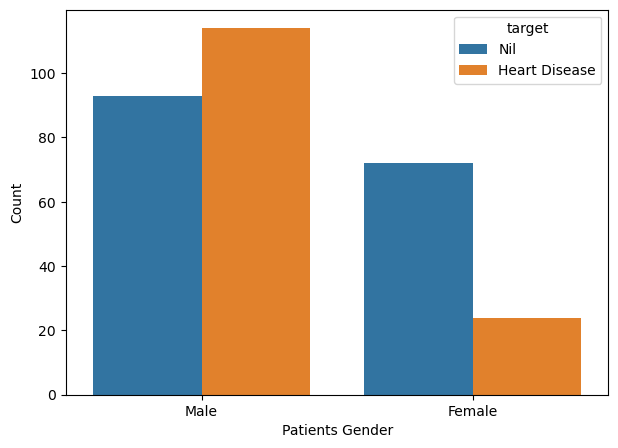

In [19]:
plt.figure(figsize=(7,5))
Gender= sns.countplot(x="Gender", data=df, hue="target", order=df["Gender"].value_counts(ascending=False).index)
plt.xlabel("Patients Gender")
plt.ylabel("Count")
Age_Grp.set_title("Patient by Gender with Heart Disease");

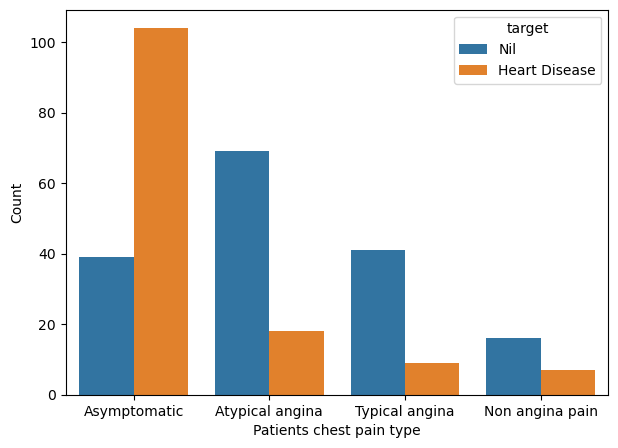

In [20]:
plt.figure(figsize=(7,5))
Gender= sns.countplot(x="chest_pain", data=df, hue="target", order=df["chest_pain"].value_counts(ascending=False).index)
plt.xlabel("Patients chest pain type")
plt.ylabel("Count")
Age_Grp.set_title("Patient by chest pain type with Heart Disease");

Text(0.5, 1.0, 'Correlation Matrix for the Dataset')

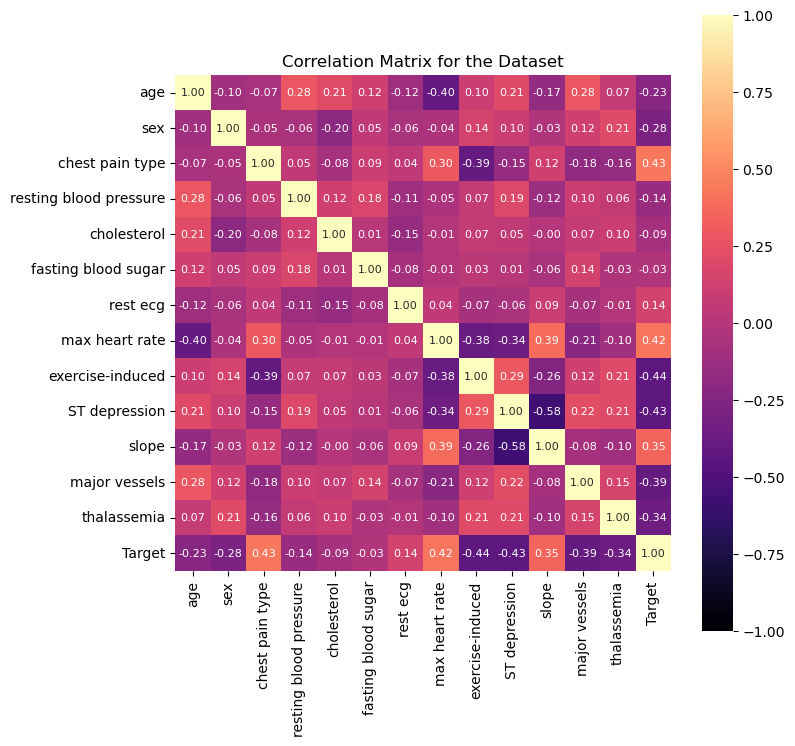

In [21]:
plt.figure(figsize=(8,8))
hm=sns.heatmap(df.corr(), cbar=True,cmap="magma", vmax=1, vmin=-1, annot=True, square=True, fmt=".2f", annot_kws={"size": 8})
hm.set_title("Correlation Matrix for the Dataset")

### Feature Engineering / Data Preprocessing

In [22]:
df.head(3)

,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,rest ecg,max heart rate,exercise-induced,ST depression,slope,major vessels,thalassemia,Target,Age_Group,Gender,chest_pain,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,<=Elder,Male,Non angina pain,Nil
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,<=Adult,Male,Atypical angina,Nil
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,<=Adult,Female,Typical angina,Nil


In [23]:
df1= df[['age', 'sex', 'chest pain type', 'resting blood pressure',
       'cholesterol', 'fasting blood sugar', 'rest ecg', 'max heart rate',
       'exercise-induced', 'ST depression', 'slope', 'major vessels',
       'thalassemia']]
results= df[["Target"]]

In [24]:
df1.head()

,age,sex,chest pain type,resting blood pressure,cholesterol,fasting blood sugar,rest ecg,max heart rate,exercise-induced,ST depression,slope,major vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
results.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest pain type         303 non-null    int64  
 3   resting blood pressure  303 non-null    int64  
 4   cholesterol             303 non-null    int64  
 5   fasting blood sugar     303 non-null    int64  
 6   rest ecg                303 non-null    int64  
 7   max heart rate          303 non-null    int64  
 8   exercise-induced        303 non-null    int64  
 9   ST depression           303 non-null    float64
 10  slope                   303 non-null    int64  
 11  major vessels           303 non-null    int64  
 12  thalassemia             303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [27]:
df1.columns

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'cholesterol', 'fasting blood sugar', 'rest ecg', 'max heart rate',
       'exercise-induced', 'ST depression', 'slope', 'major vessels',
       'thalassemia'],
      dtype='object')

In [28]:
# Dealing with outlier ('resting blood pressure','cholesterol', 'max heart rate','thalassemia')

# Normalise the data
scaler= MinMaxScaler()

df1["Scaled_RBP"]= scaler.fit_transform(df1["resting blood pressure"].values.reshape(-1,1))
df1["Scaled_chol"]= scaler.fit_transform(df1["cholesterol"].values.reshape(-1,1))
df1["Scaled_MHR"]= scaler.fit_transform(df1["max heart rate"].values.reshape(-1,1))
df1["Scaled_thal"]= scaler.fit_transform(df1["thalassemia"].values.reshape(-1,1))

df1.drop(["resting blood pressure","cholesterol","max heart rate","thalassemia"], axis=1, inplace=True)

df1.head(3)

,age,sex,chest pain type,fasting blood sugar,rest ecg,exercise-induced,ST depression,slope,major vessels,Scaled_RBP,Scaled_chol,Scaled_MHR,Scaled_thal
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.603053,0.333333
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.885496,0.666667
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.770992,0.666667


## Machine Learning

In [29]:
# split dataset into training and test set X= Question y= Answer
X_train, X_test, y_train, y_test= train_test_split(df1,results,test_size=0.2,random_state=42)

In [30]:
X_train

,age,sex,chest pain type,fasting blood sugar,rest ecg,exercise-induced,ST depression,slope,major vessels,Scaled_RBP,Scaled_chol,Scaled_MHR,Scaled_thal
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.694656,0.666667
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,0.305344,1.000000
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.580153,0.666667
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.687023,0.666667
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,0.679389,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,0,1,0,0.6,1,1,0.433962,0.244292,0.702290,1.000000
71,51,1,2,0,1,1,0.0,2,1,0.000000,0.230594,0.633588,1.000000
106,69,1,3,1,0,0,0.1,1,1,0.622642,0.246575,0.458015,0.666667
270,46,1,0,0,0,0,0.8,2,0,0.245283,0.280822,0.557252,1.000000


In [31]:
# model building

# Logistic Regression

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

pred_y= logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, pred_y))
print("Precision:", precision_score(y_test, pred_y))
print("Recall:", recall_score(y_test, pred_y))
print("f1_score:", f1_score(y_test, pred_y))
print("AUC ROC:", roc_auc_score(y_test, pred_y))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
f1_score: 0.8524590163934426
AUC ROC: 0.8545258620689655


In [32]:
pred_y

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [33]:
y_test

,Target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


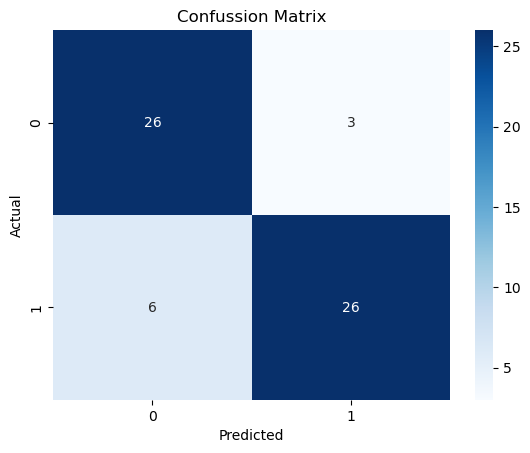

In [34]:
# create a logistic confusion matrix

logCM= confusion_matrix(y_test, pred_y)

#visualise LogCM
sns.heatmap(logCM, cmap="Blues", annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confussion Matrix")
plt.show()

In [35]:
# model building
# random forest classifier

rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(rfy_pred, y_test))
print("Precision:", precision_score(rfy_pred, y_test))
print("Recall:", recall_score(rfy_pred, y_test))
print("F1 Score:", f1_score(rfy_pred, y_test))
print("AUC ROC:", roc_auc_score(rfy_pred, y_test))

Random Forest Classifier
Accuracy: 0.8524590163934426
Precision: 0.84375
Recall: 0.8709677419354839
F1 Score: 0.8571428571428571
AUC ROC: 0.8521505376344087


In [36]:
rfy_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
y_test

,Target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


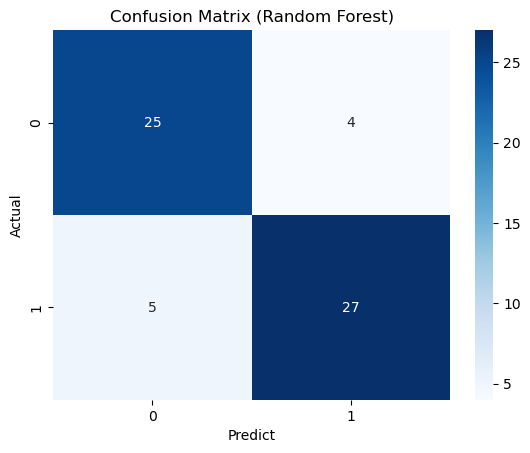

In [38]:
# create a random forest Confusion matrix
RanCM= confusion_matrix(y_test, rfy_pred)

sns.heatmap(RanCM, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)");

In [39]:
# applied different machine learning algorithms

classifier=[[XGBClassifier(),"XGB Classifier"],
           [SGDClassifier(),"SGD Classifier"],
            [LogisticRegression(), "Logistic Regression"],
            [KNeighborsClassifier(),"KNeighbors Classifier"],
           [RandomForestClassifier(),"Random Forest Classifier"],
            [SVC(),"SVC"],
            [GaussianNB(),"Naive Bayes"],
            [DecisionTreeClassifier(),"Decision Tree Classifier"]]

In [40]:
classifier[0]

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'XGB Classifier']

In [41]:
acc_list={}
pre_list={}
recall_list={}
#f1_list={}
roc_list={}

for unique in classifier:
    model= unique[0]
    model.fit(X_train, y_train)
    model_name= unique[1]
    
    pred= model.predict(X_test)
    
    acc_score= accuracy_score(y_test,pred)
    pre_score= precision_score(y_test,pred)
    recal_score= recall_score(y_test,pred)
    #f1_score= f1_score(y_test,pred)
    roc_score= roc_auc_score(y_test,pred)
    
    acc_list[model_name] = ([str(round(acc_score*100,2)) + "%"])
    pre_list[model_name] = ([str(round(pre_score*100,2)) + "%"])
    recall_list[model_name] = ([str(round(recal_score*100,2)) + "%"])
    #f1_list[model_name] = ([str(round(f1_score*100,2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + "%"])
    
    if model_name != classifier[-1][1]:
        print("")
        

In [42]:
acc_list

{'XGB Classifier': ['83.61%'],
 'SGD Classifier': ['77.05%'],
 'Logistic Regression': ['85.25%'],
 'KNeighbors Classifier': ['75.41%'],
 'Random Forest Classifier': ['83.61%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision Tree Classifier': ['80.33%']}

In [43]:
pre_list

{'XGB Classifier': ['86.67%'],
 'SGD Classifier': ['70.45%'],
 'Logistic Regression': ['89.66%'],
 'KNeighbors Classifier': ['79.31%'],
 'Random Forest Classifier': ['84.38%'],
 'SVC': ['65.71%'],
 'Naive Bayes': ['90.0%'],
 'Decision Tree Classifier': ['91.67%']}

In [44]:
recall_list

{'XGB Classifier': ['81.25%'],
 'SGD Classifier': ['96.88%'],
 'Logistic Regression': ['81.25%'],
 'KNeighbors Classifier': ['71.88%'],
 'Random Forest Classifier': ['84.38%'],
 'SVC': ['71.88%'],
 'Naive Bayes': ['84.38%'],
 'Decision Tree Classifier': ['68.75%']}

In [45]:
roc_list

{'XGB Classifier': ['83.73%'],
 'SGD Classifier': ['76.02%'],
 'Logistic Regression': ['85.45%'],
 'KNeighbors Classifier': ['75.59%'],
 'Random Forest Classifier': ['83.57%'],
 'SVC': ['65.25%'],
 'Naive Bayes': ['87.02%'],
 'Decision Tree Classifier': ['80.93%']}

##### In conclusion, the precision scores from various algorithms are as follows:
- Decision Tree Classifier: 91.67%
- SGD Classifier: 90.62%	
- Logistic Regression	: 89.66%	
- XGB Classifier: 86.67%

##### Among these algorithms, the Decision Tree Classifier achieved the highest precision score of 91.67%.

In [46]:
print("Accuracy Score")
acc_pd = pd.DataFrame(acc_list)
acc_pd

Accuracy Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,83.61%,77.05%,85.25%,75.41%,83.61%,65.57%,86.89%,80.33%


In [47]:
print("Precision Score")
pre_pd = pd.DataFrame(pre_list)
pre_pd

Precision Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,86.67%,70.45%,89.66%,79.31%,84.38%,65.71%,90.0%,91.67%


In [48]:
print("Recall Score")
recall_pd = pd.DataFrame(recall_list)
recall_pd

Recall Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,81.25%,96.88%,81.25%,71.88%,84.38%,71.88%,84.38%,68.75%


In [49]:
print("Roc_Auc Score")
roc_pd = pd.DataFrame(roc_list)
roc_pd

Roc_Auc Score


,XGB Classifier,SGD Classifier,Logistic Regression,KNeighbors Classifier,Random Forest Classifier,SVC,Naive Bayes,Decision Tree Classifier
0,83.73%,76.02%,85.45%,75.59%,83.57%,65.25%,87.02%,80.93%
